In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.1 MB/s eta 0:00:00


In [ ]:
pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 13.6 MB/s eta 0:00:00


In [ ]:
pip install qiskit[nature]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.8 MB/s eta 0:00:00


In [ ]:
pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=c8e8671068893f220efea912b5fdbbb821d417b6a8d022e9cbec43b0e8482cd8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
# Defining the H_2 molecule using PySCF driver
# the hydrogen molecule at equilibrium bond length (0.735 angstrom) in the singlet state and with no charge.

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.hamiltonians import ElectronicEnergy

driver = PySCFDriver(
    atom = "H 0 0 0; H 0 0 0.735",
    basis = "sto3g",
    charge = 0,
    spin = 0,
    unit = DistanceUnit.ANGSTROM,)

problem = driver.run()

print(problem)


## **Create a fermionic operator**

In [ ]:
# one body and two body integrals values are borrowed from qiskit library for a given molecule

hamiltonian = problem.hamiltonian

coefficients = hamiltonian.electronic_integrals

print(coefficients.alpha)

Polynomial Tensor
 "+-":
[[-1.25633907e+00 -1.37083854e-17]
 [-6.07732712e-17 -4.71896007e-01]]
 "++--":
[[[[6.75710155e-01 1.69253442e-16]
   [1.56722377e-16 1.80931200e-01]]

  [[4.84650299e-17 1.80931200e-01]
   [6.64581730e-01 3.79897400e-16]]]


 [[[1.01440795e-16 6.64581730e-01]
   [1.80931200e-01 4.71502663e-17]]

  [[1.80931200e-01 3.78920172e-16]
   [6.59828421e-17 6.98573723e-01]]]]


In [ ]:
# the second quantized hamiltonian representing fermionic modes in annihilation and creation operator formalism.

second_q_op = hamiltonian.second_q_op()

print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211565 * ( +_1 +_3 -_2 -_0 )
+ 0.3492868613660089 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.09046559989211568 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655

## Create a Qubit Operator

In [ ]:
# Transforming fermionic hamiltonian to qubit hamiltonian by mapppin the annihilation and creation operator to Pauli spin operators

from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()

In [ ]:
qubit_jw_op = mapper.map(second_q_op)

print(qubit_jw_op)

-0.8105479805373275 * IIII
+ 0.1721839326191556 * IIIZ
- 0.2257534922240239 * IIZI
+ 0.17218393261915554 * IZII
- 0.2257534922240239 * ZIII
+ 0.12091263261776629 * IIZZ
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605784 * YYYY
+ 0.04523279994605784 * XXYY
+ 0.04523279994605784 * YYXX
+ 0.04523279994605784 * XXXX
+ 0.16614543256382414 * ZIIZ
+ 0.16614543256382414 * IZZI
+ 0.17464343068300445 * ZIZI
+ 0.12091263261776629 * ZZII


/usr/local/lib/python3.10/dist-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


## Finding Z2 symmetries

In [ ]:
# Finding the z2 symmetery generators using the commutation rules as defined in section 4.4

from qiskit_nature.second_q.mappers import QubitConverter

conv = QubitConverter(mapper)

z2 = conv.find_taper_op(qubit_jw_op)

sym = z2[1].find_Z2_symmetries(qubit_jw_op)

print(sym)

Z2 symmetries:
Symmetries:
ZIIZ
ZIZI
ZZII
Single-Qubit Pauli X:
IIIX
IIXI
IXII
Cliffords:
0.7071067811865475 * ZIIZ
+ 0.7071067811865475 * IIIX
0.7071067811865475 * ZIZI
+ 0.7071067811865475 * IIXI
0.7071067811865475 * ZZII
+ 0.7071067811865475 * IXII
Qubit index:
[0, 1, 2]
Tapering values:
  - Possible values: [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1], [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]


<ipython-input-11-43a51179540e>:5: DeprecationWarning: The QubitConverter class is deprecated as of version 0.6.0 and will be removed no sooner than 3 months after the release . Instead you should directly use the QubitMapper instance which you used to pass into the QubitConverter as the first argument. Refer to the documentation of the qiskit_nature.second_q.mappers module for more information.
  conv = QubitConverter(mapper)


In [ ]:
# Tappering off the qubits using the above clliford operators generated with the help of z2 symmeteries

from qiskit_nature.second_q.mappers.tapered_qubit_mapper import TaperedQubitMapper

tapered_mapper = problem.get_tapered_mapper(mapper)

qubit_op = tapered_mapper.map(second_q_op)

print(qubit_op)

-1.041093141516624 * I
- 0.7958748496863585 * Z
+ 0.18093119978423122 * X


## Creating the circuit for parametrized trial state

In [ ]:
import numpy as np
pi = np.pi
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:
# preparing a circuit for trial wavefuction

def prepare_circuit(depth, angle1, angle2):

    circuit = QuantumCircuit(depth)

    for i in range(depth):

        circuit.ry(angle1,i)
        circuit.rz(angle1,i)
        circuit.ry(angle2,i)
        circuit.rz(angle2,i)

    return circuit

Preparing circuit for 1 trial guess value as an example of how the circuit works for a particular value.


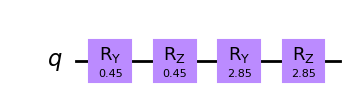

In [ ]:
# For the first guess, we will use rotation angles in the range of (-𝜋/2,𝜋/2)  on all the  𝑅𝑦 and  𝑅𝑧 gates.

angle1 = np.random.normal(-pi/2,pi/2)
angle2 = np.random.normal(-pi/2,pi/2)
circ = prepare_circuit(1, angle1, angle2)
circ.draw('mpl')

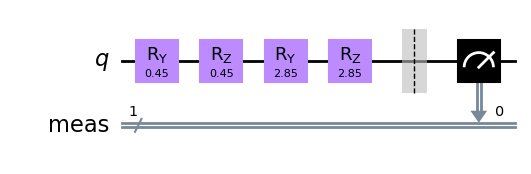

In [ ]:
# Circuit for measuring the expectation value of pauli z operator

def measure_z_circuit(given_circuit):

    z_meas = given_circuit.copy()
    z_meas.measure_all()
    return z_meas

z_meas = measure_z_circuit(circ)
z_meas.draw("mpl")

**Running on Quantum Computer**

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

IBMQ.save_account("eb51948e03130da6b3212b337a0276eb3ddfb106e6e3ff49388aaf14efdded08d2624fa55f7d7158e02266b904d46424988e127c44056949754947d624319860")

configrc.store_credentials:WARNING:2023-05-28 18:28:02,697: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

ibmqfactory.load_account:WARNING:2023-05-28 18:28:03,547: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational==True))
print(backend)
t_qc = transpile(z_meas, backend, optimization_level=3)#transpile=assembling the circuit and everything
job = backend.run(t_qc)#backend means device
job_monitor(job)

ibmq_lima
Job Status: job is queued (None)

In [ ]:
result = job.result()
counts = result.get_counts(z_meas)
print(counts)
plot_histogram(counts)

Running on simulator

In [ ]:
# simulator = Aer.get_backend('qasm_simulator')

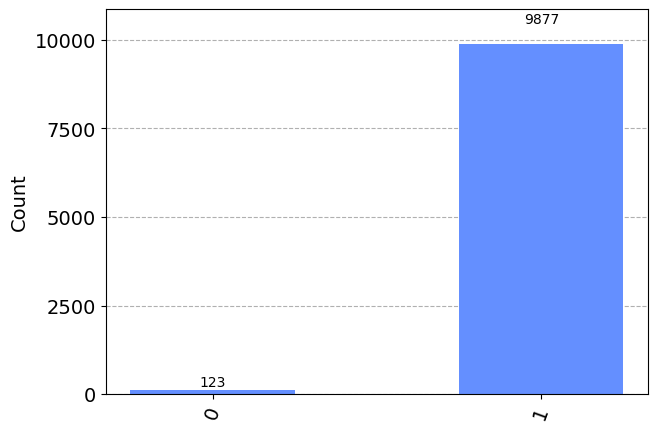

In [ ]:
# result = execute(z_meas, backend = simulator, shots=10000).result()
# counts = result.get_counts(z_meas)

# plot_histogram(counts)

In [ ]:
def measure_z(given_circuit, num_shots = 10000):

    z_meas = measure_z_circuit(given_circuit)

    result = execute(z_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(z_meas)

    if '0' not in counts:
        counts['0'] = 0

    if '1' not in counts:
        counts['1'] = 0

    total_counts = counts['0'] + counts['1']
    z = counts['0'] - counts['1']
    z = z / total_counts

    return z

In [ ]:
z = measure_z(circ)
print("<Z> =", str(z))

<Z> = -0.977


In [ ]:
# Circuit for measuring the expectation value of pauli x operator

def measure_x_circuit(given_circuit):
    x_meas = given_circuit.copy()

    x_meas.h(0)
    x_meas.measure_all()

    return x_meas

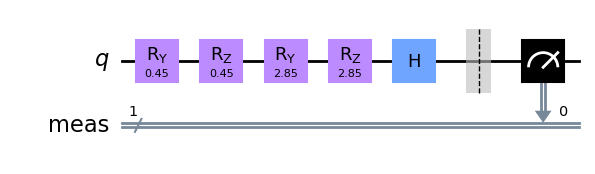

In [ ]:
x_meas = measure_x_circuit(circ)
x_meas.draw("mpl")

In [ ]:
def measure_x(given_circuit, num_shots = 10000):

    x_meas = measure_x_circuit(given_circuit)

    # result = execute(x_meas, backend = simulator, shots = num_shots).result()
    # counts = result.get_counts(x_meas)

    backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational==True))
    print(backend)
    t_qc = transpile(x_meas, backend, optimization_level=3)#transpile=assembling the circuit and everything
    job = backend.run(t_qc)#backend means device
    job_monitor(job)

    result = job.result()
    counts = result.get_counts(x_meas)

    if '0' not in counts:
        counts['0'] = 0

    if '1' not in counts:
        counts['1'] = 0

    total_counts = counts['0'] + counts['1']
    x = counts['0'] - counts['1']
    x = x / total_counts

    return x

x = measure_x(circ)
print("<X> =", str(x))

<X> = 0.0618


In [ ]:
# adding all the expectation values as calculated from the above circuits

def get_energy(given_circuit, num_shots = 10000):

  z = measure_z(given_circuit, num_shots = num_shots)
  x = measure_x(given_circuit, num_shots = num_shots)

  energy = (-1.0410931415166227)*1 + (- 0.7958748496863586)*z + (0.18093119978423122)*x

  return energy

In [ ]:
energy = get_energy(circ)
print("The energy of the trial state is", str(energy))

The energy of the trial state is -0.2514514168082093


## Classical optimizer

Using A classical optimizer (SPSA) to give an optimal solutions for the ground state eigenvalue of H_2 molecule. Borrowed from qiskit open source library.

In [ ]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit import Parameter
from qiskit.opflow import StateFn
from qiskit.circuit.library import PauliTwoDesign

theta = Parameter('theta')  # for choosing a random value we are assigning angle of Ry,Rz gates the parameters
phi = Parameter('phi')

angle1 = theta
angle2 = phi

ansatz = prepare_circuit(1, angle1, angle2)
observable = qubit_op

iter = 0

def loss(x):
    bound = ansatz.bind_parameters(x)
    return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())

spsa = SPSA(maxiter=300)

res_array = []

for i in range(5):

  initial_point = np.random.random(ansatz.num_parameters)
  result = spsa.minimize(loss, initial_point)
  res_array.append(result.fun)  # adding the the value of loss function from the result to an array


<ipython-input-27-5ad2a2e6838a>:20: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())
<ipython-input-27-5ad2a2e6838a>:20: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())


In [ ]:
print(''Possible ground state values obatined by runing the optimizer for 100 shots',res_array)
print('The ground state for H_2 molecule is:',min(res_array))

In [ ]:
ansatz.draw('mpl')